# Interpretability of a BoW word and character n-gram model

This notebook shows how to use [SHAP](https://github.com/slundberg/shap) to interpret the output of a classifier trained to distinguish between "sexism"/"no sexism" tweets using the dataset from [Waseem and Hovy](https://github.com/ZeerakW/hatespeech). The notebook will serve as background information when extending [A Robust Baseline for Detecting Abusive Language](https://www.overleaf.com/18380535dxwkqqkjsnds#/69381694/) into a long paper for [ISI 2018](http://isi18.azurewebsites.net/).

## Set up
Set up the environment. Load utilities and models, initialize SHAP, the library we'll use to interpret the learned model.

**NOTE** that you'll need a bunch of pickled models to run this notebook. You can either use code from the `interpretability_utils` file to compute and serialize the objects, or you can get the pre-computed objects via Fredrik's [Dropbox](https://www.dropbox.com/sh/7ak3rju7b5pxao7/AABjRVHESxJrj7ofcWOHrRgba?dl=0) (the link might be deleted at anytime!). The pickled models are too big to fit nicely in GitLab. 

Download the contents of the `models`directory and place it in `alw2/interpretability/models/` in your local copy of the Gitlab repository containing the work for alw2 before continuing to play around with this notebook.

In [1]:
import interpretability_utils

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
e = interpretability_utils.ExampleExplainer("models/k_means_200_clusters/", "ngram")

In [3]:
e.initialize()

Loading data from disk
Done loading data


In [4]:
import shap
shap.initjs()

In [6]:
from sklearn.externals import joblib
vectorizer = joblib.load("models/k_means_200_clusters/ngram_vectorizer.pkl")

## Overview of the data set
Get an overview of the complete test set (536 instances). The graph below shows the most influential 20 features across the data set. Read it like this: "chars__" mean that feature originates from the character vectorizer, and the following sequence of characters denote the actual feature. For instance, "chars__ #" is the second most influential feature, and it contributes to the overall explanation of the classifiers behaviour on the data set both when it comes to classifying something as being of the "sexism" class (represented by the dots to the right in the graph), and to debunk a "sexism" decision (to the left in the class). It appears high values on the feature (which is ranked based on n-gram TFIDF), indicated by redness of the dots, contribute more to decisions favoring a "sexism" classification.

Note that while the feature space includes word n-grams, no such features made it to top 20.

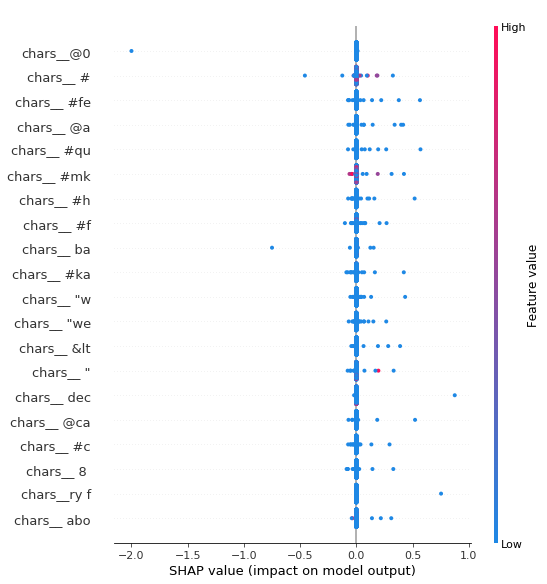

In [7]:
shap.summary_plot(e.shap_values[1], e.testing_documents, feature_names=vectorizer.get_feature_names())

The graph below is another view of the previous graph, only this time, it shows the features ranked according to their contribution to the model's decision based on the mean of the absolute scores.

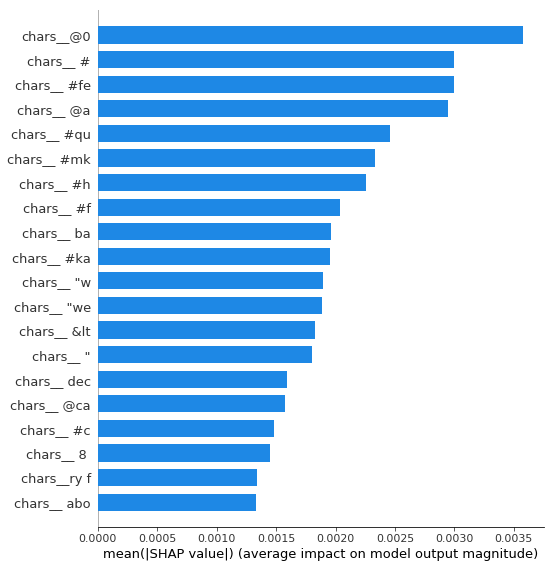

In [8]:
shap.summary_plot(e.shap_values[1], e.testing_documents, feature_names=vectorizer.get_feature_names(), plot_type="bar")

## Interpretation of the classification of individual tweets

Let's move on to interpret individual tweets.

In [9]:
classifier = joblib.load("models/k_means_200_clusters/ngram_estimator.pkl")

In [10]:
predictions = classifier.predict(e.testing_documents)

### Examples of tweets in the "sexism" class

Get all the tweets that the model has correctly classified as "sexism", and show them together with their indices to facilitate selection of examples later on. The idea is to look at the same examples of interpretation for this n-gram-based classifier, as we did in the case with the classifier based on the lexicon.

Get all the tweets that the model has correctly classified as "sexism", and show them together with their indices to facilitate selection of examples later on.

In [11]:
for i,item in enumerate(list(zip(e.testing_labels_text, predictions, e.testing_documents_text))):
    if item[0] == item[1] and item[1] == "sexism":
        print("idx " + str(i) + ": " + item[2])

idx 2: Colin likes moist thighs.. Preferably of the promo type... #MKR
idx 5: RT @mary__kaye: That face Kat just pulled was hideous. #mkr
idx 12: RT @thetrudz: Oh, b/c see Emma, like many WW seem to think "male gaze" is only sexual. When their feminism CENTERS WM &amp; Whiteness over BW, …
idx 14: Rape is not a synonym for "treated unfairly" or "defeated," @Samklein28.@Warnkemg got raped by his phone
idx 21: @EuroSlavA @brenbarber I actually wish they would just start using "egalitarian" so we can just let feminist mean the misandrist hypocrites.
idx 25: @MaddyBaylor Hey @BristolBen please translate this nonsensical nonanswer if you can...TY. @FutureFeminism
idx 29: RT @PhilBrindAmour Call me sexist but female sports anchors r the worst. Makes me uncomfortable when women know more about sports than I do
idx 32: RT @failla21 Call me sexist but I don't think a girl should work at a gym. They are no help when you're alone and you need a spotter.
idx 39: RT @DemaMatar: I'm not sexist but I

Unfortunately, I couldn't wrap the following code in a function and still make shap display the graph in the notebook. Hence, you have to run the following two notebook cells for each example you wish to show (or copy their contents to new cells if you wish to freeze an example).

1. Select an example in the list above. Take note of its idx value.
2. Input the idx value to the `show` function.
3. Run the `shap.force_plot(...` cell.
4. The example should be visible as a graph/image as a result.

In [12]:
index = e.show(518)

Showing testing example with index: 518
Text: YES REALLY AND NO ONE CARES ABOUT YOU! ahahahahah @papi4481 I'm not sexist, but a new Ghostbusters movie with a female cast....really?
Label: sexism


In [13]:
shap.force_plot(e.explainer.expected_value[1], e.shap_values[1][index, :], e.testing_documents.iloc[index, :])

In [14]:
index = e.show(557)

Showing testing example with index: 557
Text: RT @TheLiamJohnson nah im not sexist but female rappers cant.
Label: sexism


In [15]:
shap.force_plot(e.explainer.expected_value[1], e.shap_values[1][index, :], e.testing_documents.iloc[index, :])

In [16]:
index = e.show(267)

Showing testing example with index: 267
Text: RT @Lyall: Bosom flattering #NoMorePage3 t-shirt profile pic #FeministSelfie #irony #hypocrisy #praxis #notbad #sorry #malegaze http://t.co…
Label: sexism


In [17]:
shap.force_plot(e.explainer.expected_value[1], e.shap_values[1][index, :], e.testing_documents.iloc[index, :])

In [18]:
index = e.show(373)

Showing testing example with index: 373
Text: Stop saying dumb blondes with pretty faces as you need a pretty face to pull that off!!!! #mkr
Label: sexism


In [19]:
shap.force_plot(e.explainer.expected_value[1], e.shap_values[1][index, :], e.testing_documents.iloc[index, :])

### Examples of tweets in the "none" class

Let's look at the interpretation of some of the tweets that the classifier (and the annotator) labelled as "none", that is, not sexism.

As before, get a list of all relevant tweets.

In [20]:
for i,item in enumerate(list(zip(e.testing_labels_text, predictions, e.testing_documents_text))):
    if item[0] == item[1] and item[1] == "none":
        print("idx " + str(i) + ": " + item[2])

idx 0: @BajaLime I'm back in June ;)
idx 1: #mkr Vicki &amp; Celine "our strategy should be kick ass" no, your strategy should be COOK FOOD
idx 3: @KirinDave nope. I play WoW. GW sux.
idx 4: @Jen_X_Infinity @ShriekAPotomos @CrashOverrideNW hi. i still saw your tweet. one, i'm female. obviously. two, this isn't helping.
idx 6: MY NAME IS SPELLED WITH AN I YOU IDIOT http://t.co/FmEiV7choh
idx 8: Dictating tweets is the worst.
idx 9: Weird to be tweeting when you're supposedly chased off of Twitter. http://t.co/z8gL8L9cd5
idx 10: It's not even the fact that its 1D cause they always play 1D. It's because it was ready to run and that isn't even a single! :D #MKR
idx 13: @BlackGirlDanger cigarette trousers?
idx 15: @AgQueue uh.
idx 16: RT @PaulHaydon: That spatchcock juice that they put in the couscous looked like the gelatinous jelly that comes in a spam can. Gross! #MKR
idx 18: Nikki looks like jai'me walking the catwalk  #MKR
idx 20: RT @anne_theriault: WHY are people still working with W

In [21]:
index = e.show(0)

Showing testing example with index: 0
Text: @BajaLime I'm back in June ;)
Label: none


In [22]:
shap.force_plot(e.explainer.expected_value[1], e.shap_values[1][index, :], e.testing_documents.iloc[index, :])

In [23]:
index = e.show(16)

Showing testing example with index: 16
Text: RT @PaulHaydon: That spatchcock juice that they put in the couscous looked like the gelatinous jelly that comes in a spam can. Gross! #MKR
Label: none


In [24]:
shap.force_plot(e.explainer.expected_value[1], e.shap_values[1][index, :], e.testing_documents.iloc[index, :])

In [25]:
index = e.show(24)

Showing testing example with index: 24
Text: Ok I officially dislike Kat the most #mkr
Label: none


In [26]:
shap.force_plot(e.explainer.expected_value[1], e.shap_values[1][index, :], e.testing_documents.iloc[index, :])

In [27]:
index = e.show(110)

Showing testing example with index: 110
Text: RT @Popehat: @TheQuinnspiracy It doesn't have to be nonprofit.You could sell the tears of angry menz. I use them to soften leather upholste…
Label: none


In [28]:
shap.force_plot(e.explainer.expected_value[1], e.shap_values[1][index, :], e.testing_documents.iloc[index, :])

In [29]:
index = e.show(554)

Showing testing example with index: 554
Text: I hate y'all 😂😂 #MKR
Label: none


In [30]:
shap.force_plot(e.explainer.expected_value[1], e.shap_values[1][index, :], e.testing_documents.iloc[index, :])